In [8]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *
%load_ext autoreload

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

query_dict = {
             'clusters__vectors__algorithm__in': ['turian'],
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__unlabelled__in': ['turian'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}

def go(query_dict):
    ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
    print(ids)
    df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                      'Composer':'clusters__vectors__composer',
                                      'Unlabelled':'clusters__vectors__unlabelled'})
    df = df.convert_objects(convert_numeric=True)
    g = sns.tsplot(data=df, time='Clusters', condition='Composer', 
               value='Accuracy', unit='folds',
               marker='s', linewidth=4, ci=68) 
    g.legend(loc='lower right')
    g.set(ylim=(0.45, .8), xlim=(0, 2000))

# g.set(xscale='log')
# sns.despine(left=True)

[268, 269, 270, 271, 272, 273, 274, 275, 276, 277]
Clusters has 5000 values
Composer has 5000 values
Accuracy has 5000 values
Unlabelled has 5000 values
folds has 5000 values


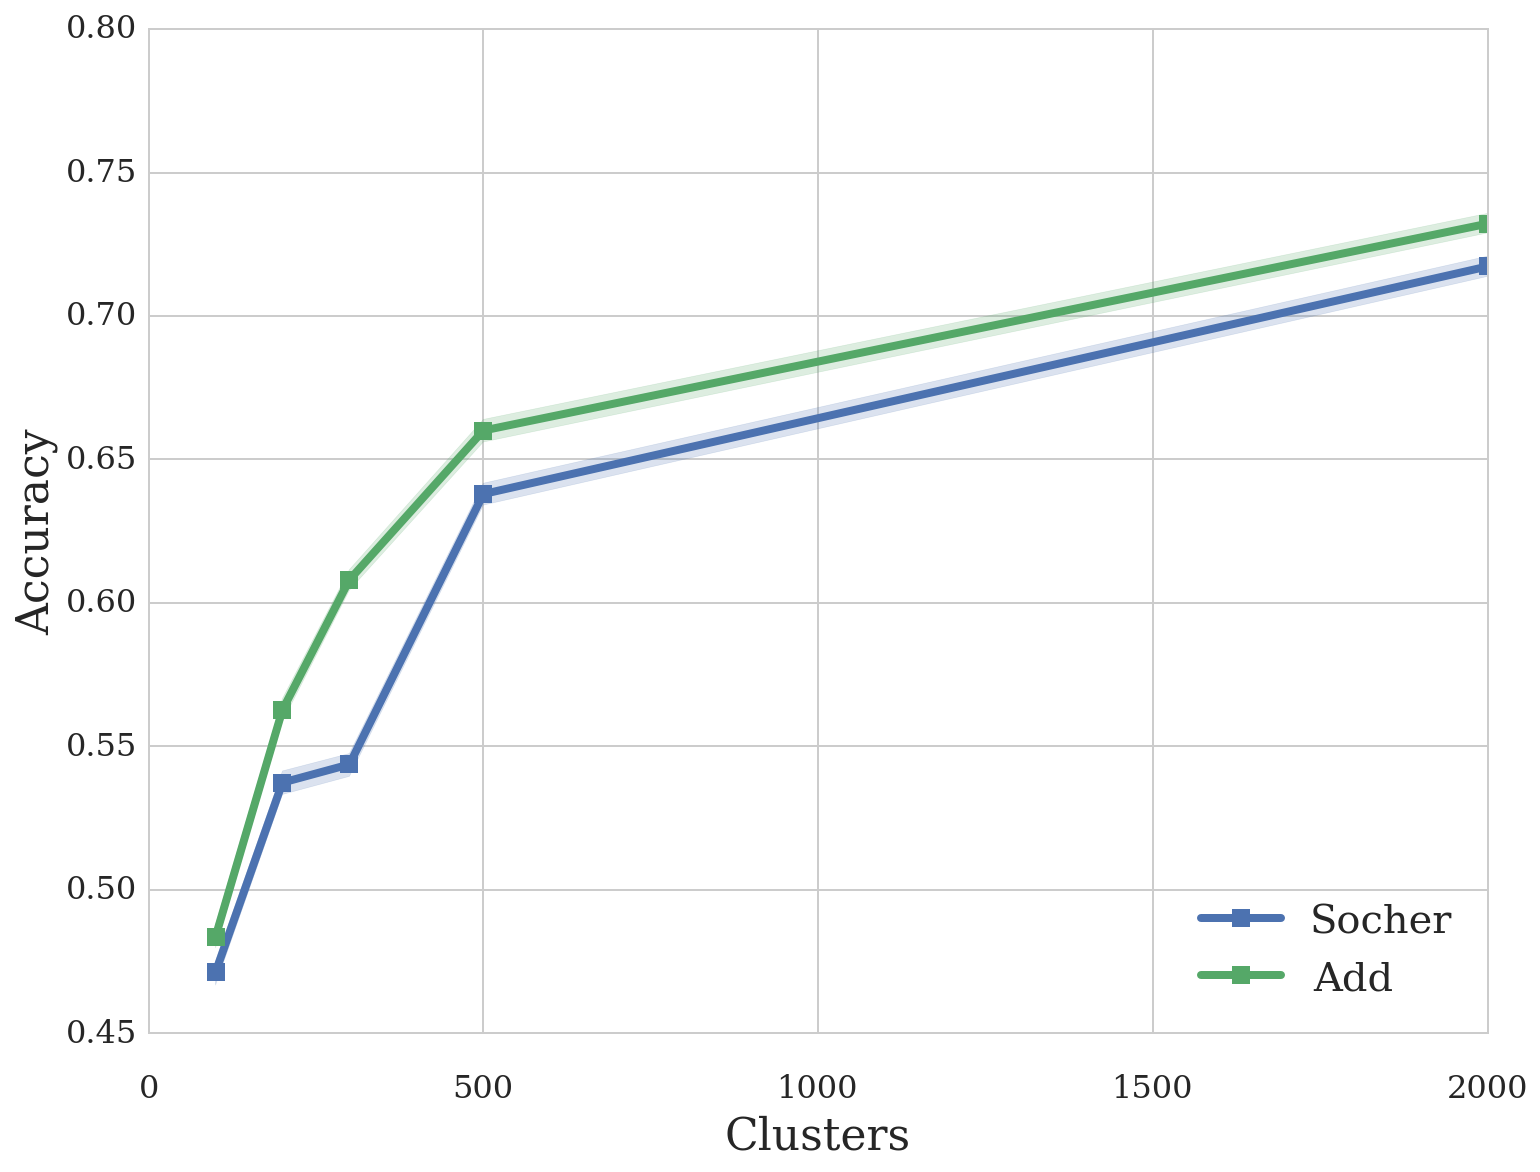

In [22]:
go(query_dict)
plt.savefig('plot-clusters1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[278, 279, 280, 281, 282, 288, 289, 290, 291, 292]
Clusters has 5000 values
Composer has 5000 values
Accuracy has 5000 values
Unlabelled has 5000 values
folds has 5000 values


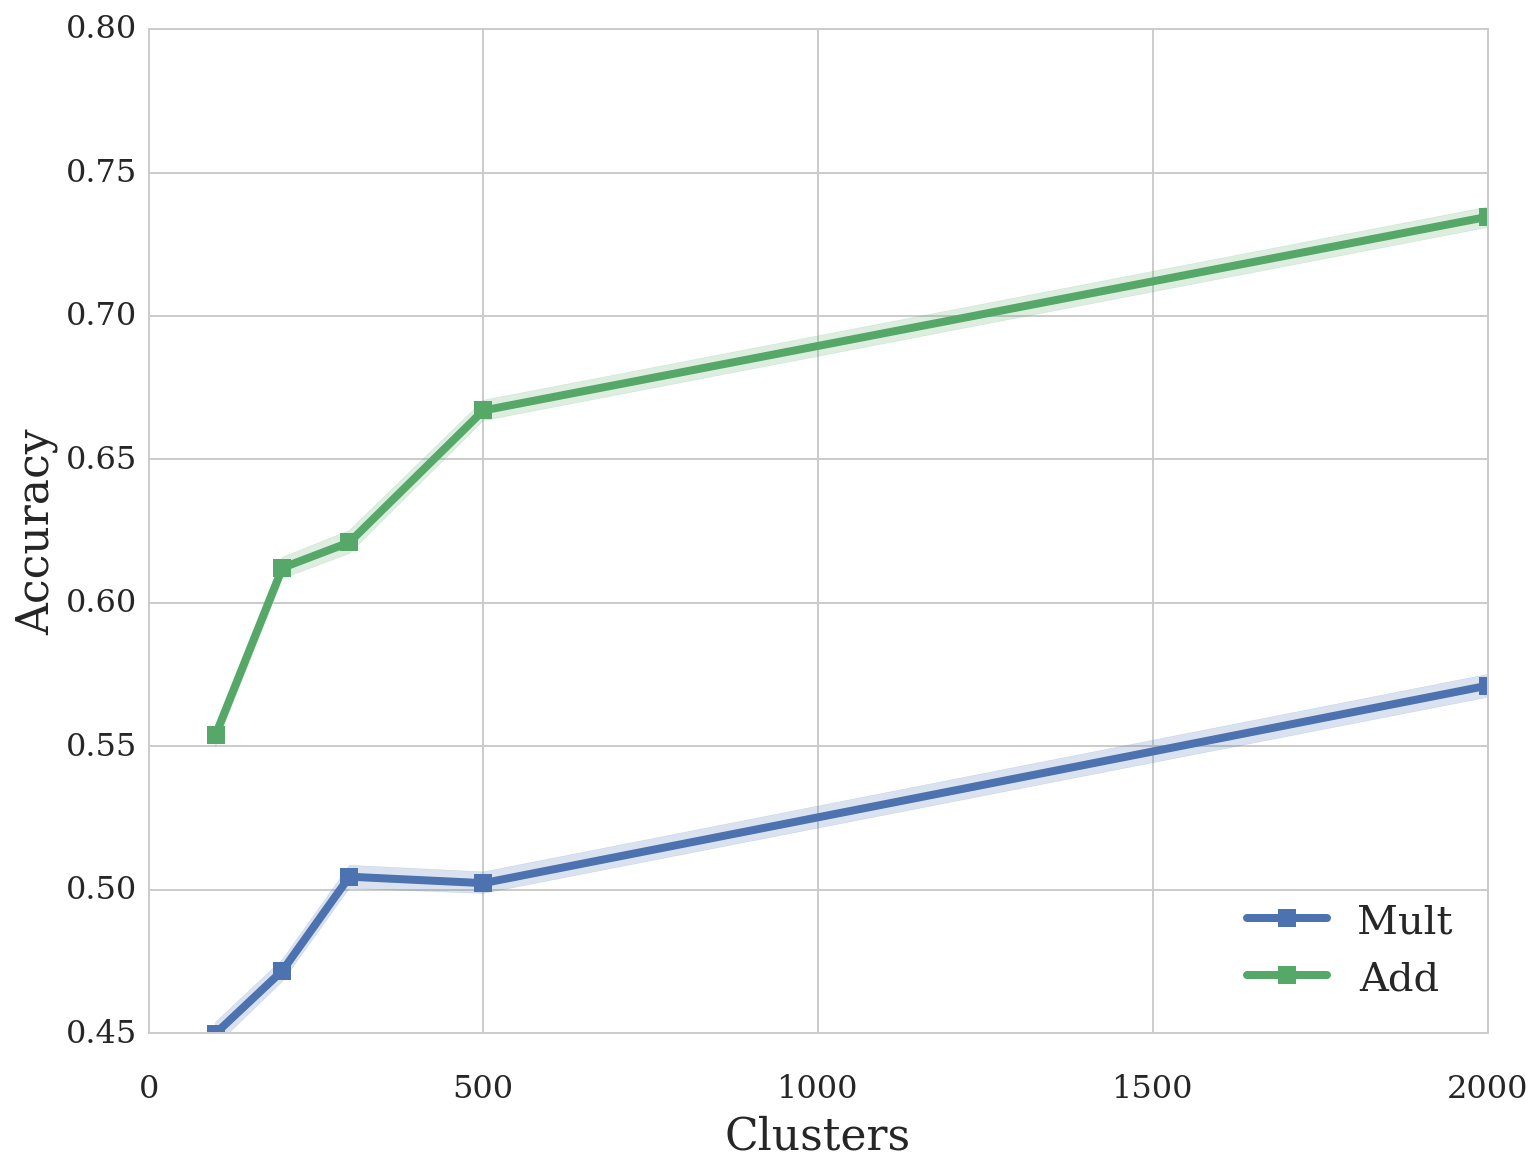

In [23]:
query_dict['clusters__vectors__algorithm__in'] = ['word2vec']
query_dict['clusters__vectors__composer__in'] = ['Add', 'Mult']
query_dict['clusters__vectors__unlabelled__in'] = ['gigaw']

go(query_dict)
plt.savefig('plot-clusters2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[283, 284, 285, 286, 287, 293, 294, 295, 296, 297]
Clusters has 5000 values
Composer has 5000 values
Accuracy has 5000 values
Unlabelled has 5000 values
folds has 5000 values


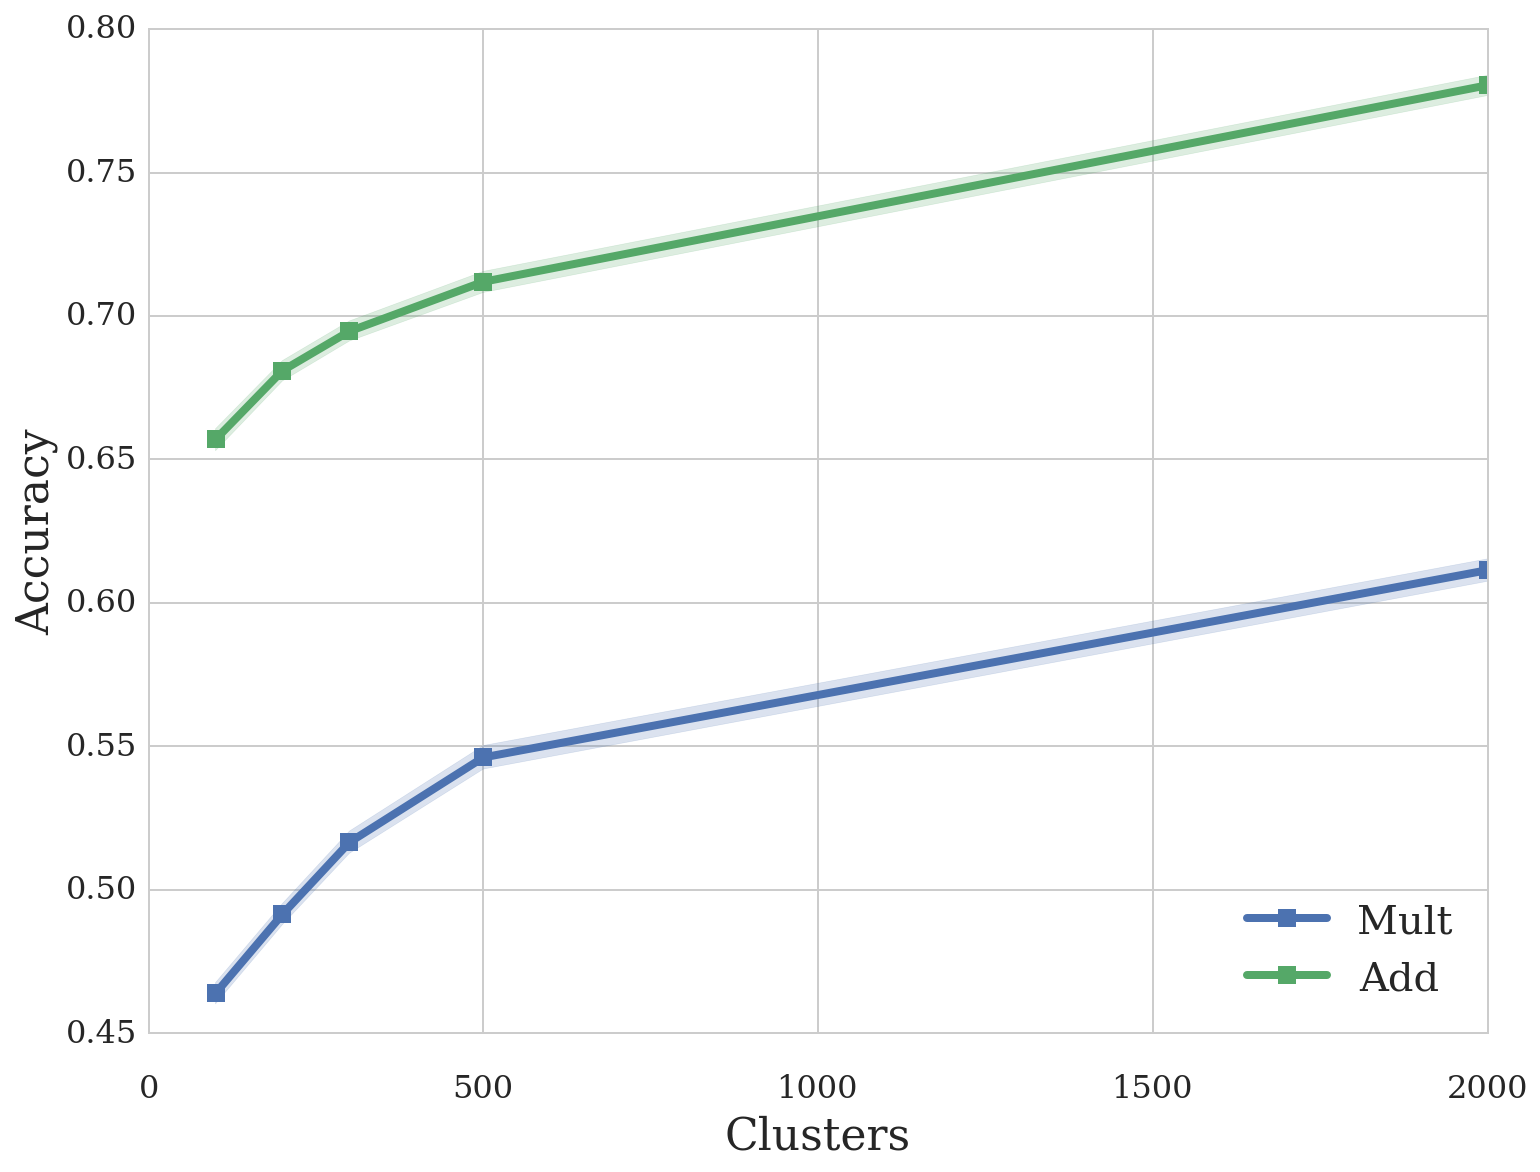

In [24]:
query_dict['clusters__vectors__unlabelled__in'] = ['wiki']
go(query_dict)
plt.savefig('plot-clusters3.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

/home/m/mm/mmb28/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[293, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323]
Percent has 5500 values
Labelled has 5500 values
Accuracy has 5500 values
folds has 5500 values


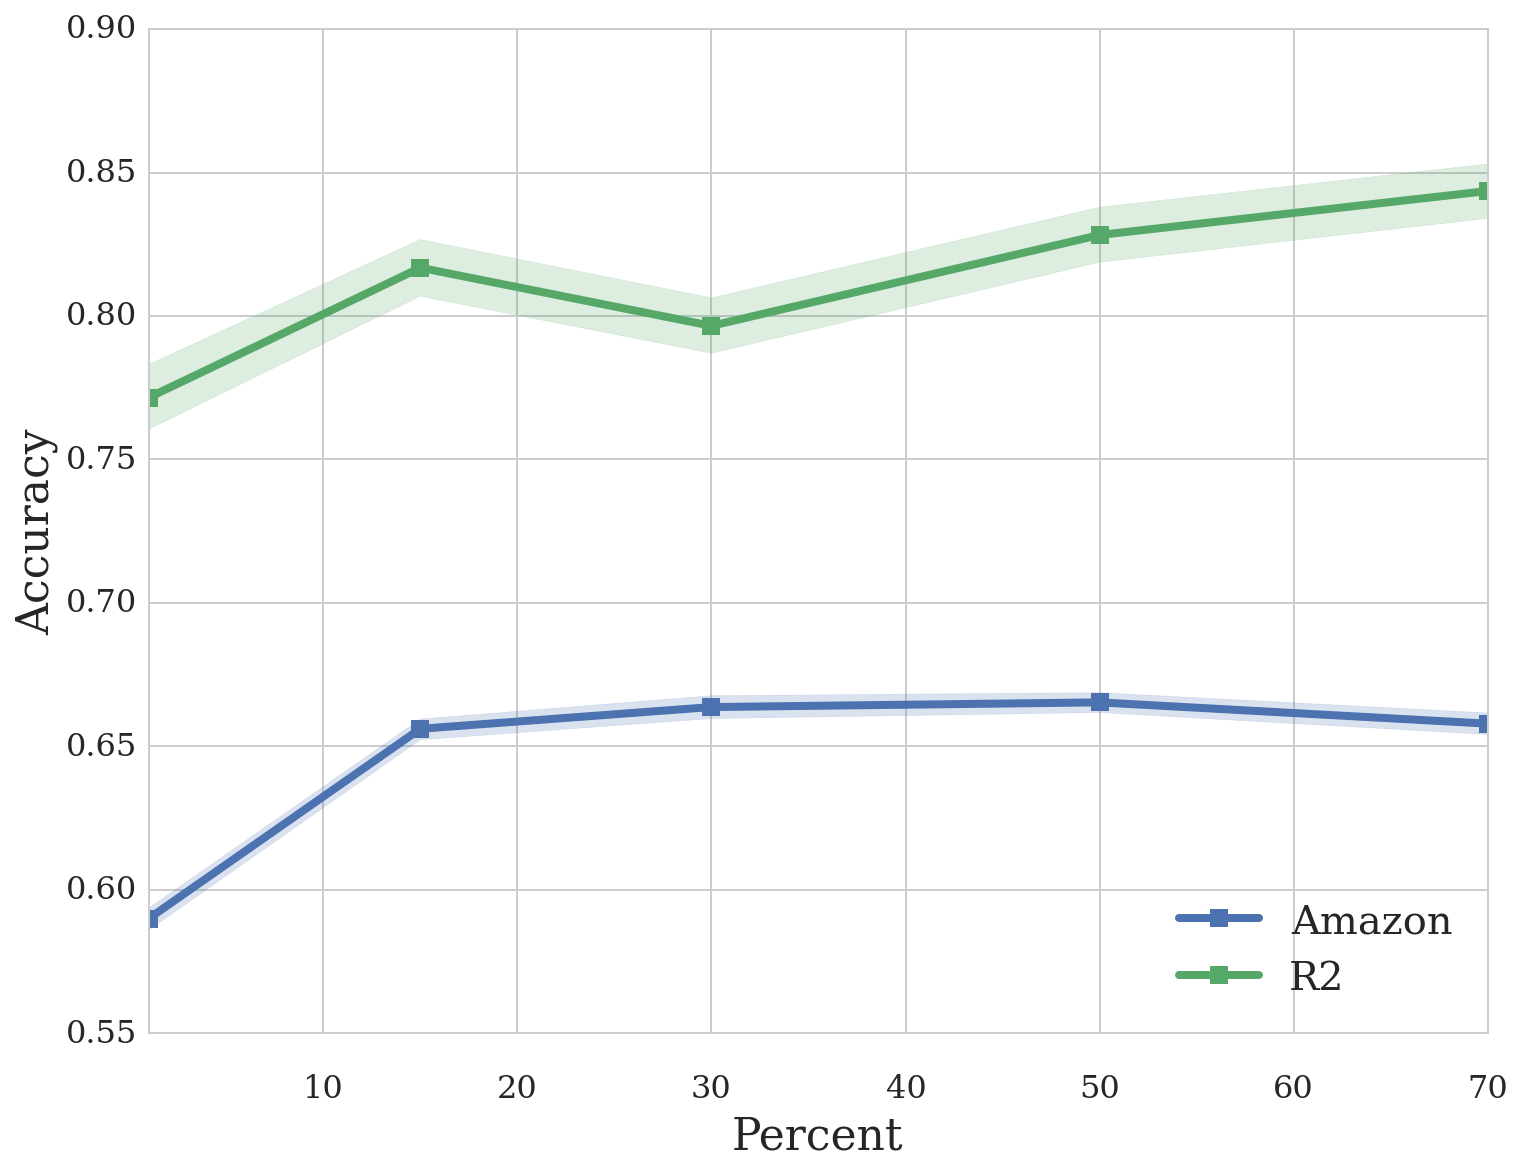

In [20]:
query_dict = {
'clusters__num_clusters': 100,
'clusters__vectors__algorithm': 'word2vec',
'clusters__vectors__composer': 'Add',
'clusters__vectors__dimensionality': 100,
'clusters__vectors__rep': 0,
'clusters__vectors__unlabelled': 'wiki',
# 'clusters__vectors__unlabelled_percentage': 70,
'document_features_ev': 'AN+NN',
'document_features_tr': 'J+N+AN+NN',
# 'labelled': 'amazon_grouped-tagged'
}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Labelled':'labelled', 
                                  'Percent':'clusters__vectors__unlabelled_percentage'})
df = df.convert_objects(convert_numeric=True)
df.Labelled[df.Labelled == 'AM'] = 'Amazon'
g = sns.tsplot(data=df, time='Percent', condition='Labelled', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4, ci=68);
g.legend(loc='lower right')
plt.savefig('plot-clusters4.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Ideally I want something like this, but seaborn is buggy 

[268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, '...(remaining elements truncated)...']
Clusters has 15000 values
Composer has 15000 values
Accuracy has 15000 values
Unlabelled has 15000 values
folds has 15000 values


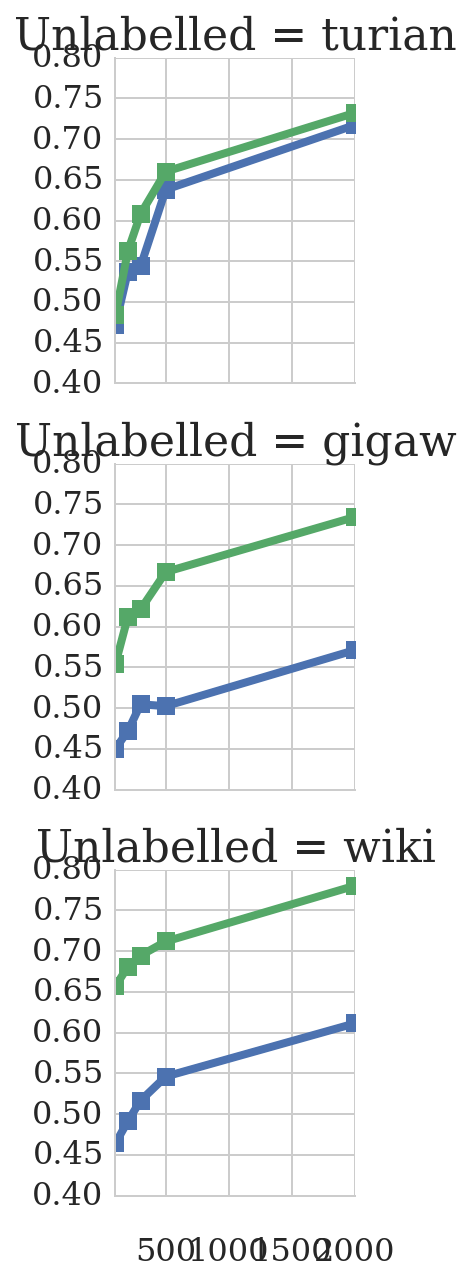

In [25]:
query_dict = {
             'clusters__vectors__algorithm__in': ['turian', 'word2vec'],
             'clusters__vectors__composer__in': ['Add', 'Socher', 'Mult'],
             'clusters__vectors__unlabelled__in': ['turian', 'wiki', 'gigaw'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer',
                                  'Unlabelled':'clusters__vectors__unlabelled'})
df = df.convert_objects(convert_numeric=True)
g = sns.FacetGrid(df, row='Unlabelled')  
g.map_dataframe(tsplot_for_facetgrid, time='Clusters', condition='Composer', 
                   value='Accuracy', unit='folds',
                   marker='s', linewidth=4, ci=68);